In [1]:
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pyGadget

In [2]:
sns.set(context='poster', style='white', font='serif', font_scale=1.)
mpl.rc('text', usetex=True)
#mpl.rc('font', size=20.)
#mpl.rc('font', family='serif')
#mpl.rc('text', usetex=True)

In [3]:
sim1 = pyGadget.sim.Simulation('stampede/halo2',length='pc', coordinates='physical', refine=False)
sim2 = pyGadget.sim.Simulation('stampede/halo2_lowres',length='pc', coordinates='physical', refine=False)
snap1 = sim1.load_snapshot(209)
snap2 = sim2.load_snapshot(173)

In [4]:
snap1.header.Redshift, snap2.header.Redshift

(21.702893449773022, 21.743205679232616)

###### CMB Floor Temp 

In [5]:
2.725*(1+snap1.header.Redshift), 2.725*(1+snap2.header.Redshift)

(61.865384650631484, 61.975235475908882)

In [6]:
snap1.sim.units.length_unit

'pc'

In [7]:
for snap in [snap1, snap2]:
    snap.gas.load_masses()
    snap.gas.load_number_density()
    snap.gas.calculate_temperature()
    #snap.gas.load_PIDs()
    snap.gas.get_coords(system='spherical', centering='box')
    snap.gas.cleanup('masses', 'ndensity', 'temperature', 'coordinates', 'r_sph')

Simple box center: 3.146e+02 3.146e+02 3.146e+02
Converting to spherical coordinates...
Simple box center: 3.141e+04 3.141e+04 3.141e+04
Converting to spherical coordinates...


In [8]:
snap1.gas.head()

,masses,ndensity,temperature,x,y,z,r_sph
70331,0.923173,0.002973,217.908487,-303.006801,-307.844016,-314.260369,534.172855
254023,0.923173,0.002892,298.598662,-310.442221,-280.718374,-302.834562,516.610056
228290,0.923173,0.002209,146.031402,-276.310771,-281.482248,-304.386339,498.227801
58,0.923173,0.002793,10.003216,-314.152276,-296.717060,-285.058552,517.678514
1497,0.923173,0.004645,16.804651,-308.458382,-297.608558,-268.849651,505.962017


In [9]:
mvals1, mvals2 = np.unique(snap1.gas.masses), np.unique(snap2.gas.masses)
print mvals1
print mvals2

[ 0.01442459  0.11539668  0.92317344]
[  1.84634688e+00   1.47707751e+01   1.18166201e+02   9.45329605e+02
   7.56263684e+03   6.05010947e+04]


In [10]:
mvals1[1:][::-1] / mvals1[:-1][::-1]

array([ 8.,  8.])

In [11]:
mvals2[1:][::-1] / mvals2[:-1][::-1]

array([ 8.,  8.,  8.,  8.,  8.])

In [12]:
for snap in [snap1, snap2]:
    print snap.gas.masses.min(), snap.gas.masses.max()

0.0144245850383 0.923173442453
1.84634688491 60501.0947246


In [13]:
for snap in [snap1, snap2]:
    print snap.gas.ndensity.max(), snap.gas.ndensity.min()

96438287.2868 0.00038696594618
4094752.38466 0.000323363414628


In [14]:
for snap in [snap1, snap2]:
    print snap.gas.temperature.max(), snap.gas.temperature.min()

15472.6768776 10.0032153113
20183.9427587 10.0035300962


In [15]:
for snap in [snap1, snap2]:
    print snap.gas.r_sph.max(), snap.gas.r_sph.min()

538.164619759 0.150608961624
53800.3706963 3.98944905522


In [16]:
from matplotlib.colors import LogNorm

stampede/halo2 209
stampede/halo2_lowres 173


/home/jhummel/anaconda/lib/python2.7/site-packages/matplotlib/image.py:359: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


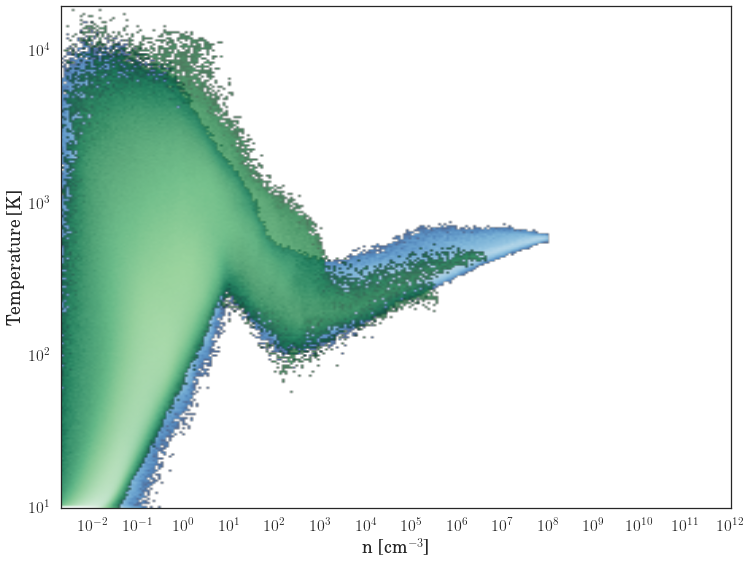

In [17]:
N=250
nbins = np.logspace(np.log10(2e-3),12,N)
tbins = np.logspace(1,np.log10(2e4),N)
fig,ax = plt.subplots(figsize=(12,9))
cmaps = ['Blues_r', 'Greens_r', 'Reds_r']
for i, snap in enumerate([snap1,snap2]):
    print snap.sim.name, snap.number
    heatmap, yedges, xedges = np.histogram2d(snap.gas.temperature, snap.gas.ndensity, bins=(tbins,nbins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), cmap=cmaps[i], extent=extent, aspect='auto', alpha=.7)
ax.set(xscale='log', yscale='log')
ax.set_xlabel('n [cm$^{-3}$]')
ax.set_ylabel('Temperature [K]')
plt.savefig('figures/refinement/T-n_hi-low.png', bbox_inches='tight')

stampede/halo2 209
stampede/halo2_lowres 173


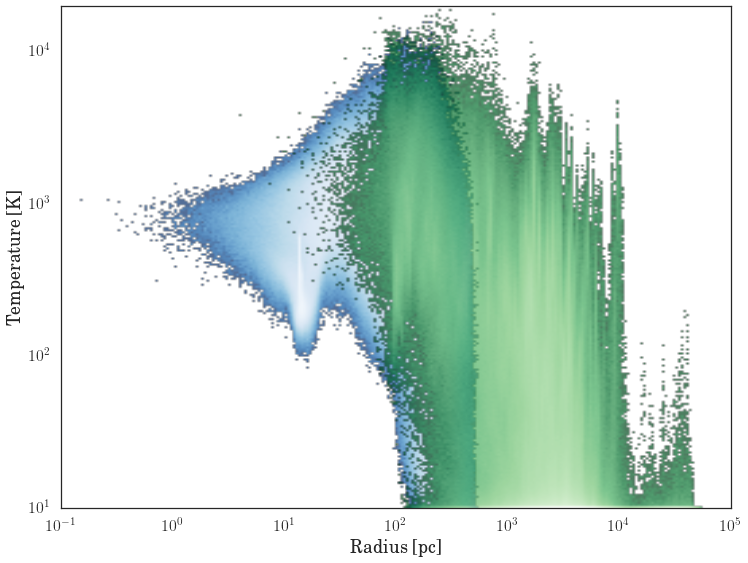

In [18]:
N=250
rbins = np.logspace(-1,5,N)
tbins = np.logspace(1,np.log10(2e4),N)
fig,ax = plt.subplots(figsize=(12,9))
cmaps = ['Blues_r', 'Greens_r', 'Reds_r']
for i, snap in enumerate([snap1,snap2]):
    print snap.sim.name, snap.number
    heatmap, yedges, xedges = np.histogram2d(snap.gas.temperature, snap.gas.r_sph, bins=(tbins,rbins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), cmap=cmaps[i], extent=extent, aspect='auto', alpha=.7)
ax.set(xscale='log', yscale='log')
ax.set_xlabel('Radius [pc]')
ax.set_ylabel('Temperature [K]')

stampede/halo2 209
stampede/halo2_lowres 173


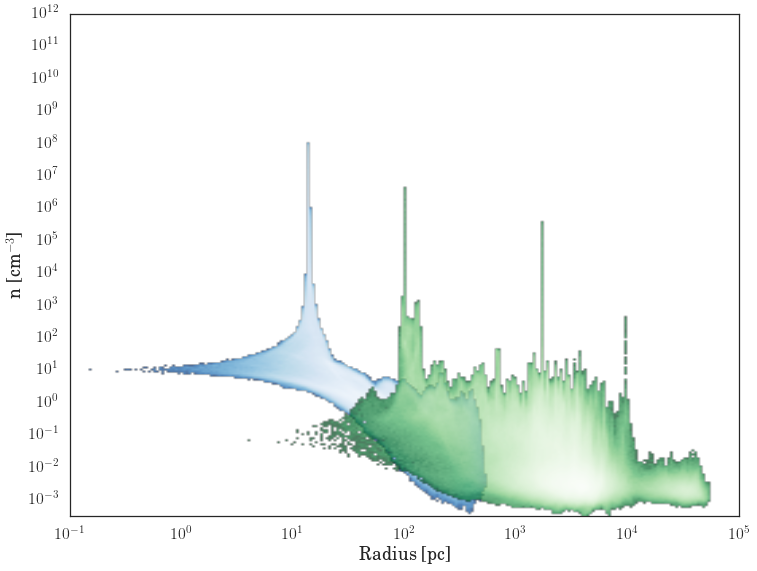

In [19]:
N=250
rbins = np.logspace(-1,5,N)
nbins = np.logspace(-3.5,12,N)
fig,ax = plt.subplots(figsize=(12,9))
cmaps = ['Blues_r', 'Greens_r', 'Reds_r']
for i, snap in enumerate([snap1,snap2]):
    print snap.sim.name, snap.number
    heatmap, yedges, xedges = np.histogram2d(snap.gas.ndensity, snap.gas.r_sph, bins=(nbins,rbins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), cmap=cmaps[i], extent=extent, aspect='auto', alpha=.7)
ax.set(xscale='log', yscale='log')
ax.set_xlabel('Radius [pc]')
ax.set_ylabel('n [cm$^{-3}$]')